In [234]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [201]:
data = pd.read_excel('./job_hunting_data.xlsx')

In [202]:
data

,序号,职位,公司,行业,企业性质,薪酬k（最低）,薪酬k（最高）,薪酬（默认12个月）,求职平台,投递日期,进度状态
0,1,市场推广经理,万达商业管理集团有限公司广州分公司,地产,民企,15,18,16,智联招聘,2023-03-22,待查看
1,2,品牌营销主管/经理,智联猎头,其他,民企,15,25,12,智联招聘,2023-03-22,待查看
2,3,品牌经理(J11609),汤臣倍健,快消,民企,30,40,12,智联招聘,2023-03-22,待查看
3,4,品牌高级专业经理,星河湾集团,地产,民企,15,25,12,智联招聘,2023-03-24,待查看
4,5,品牌经理 Brand Manager,广州屈臣氏食品饮料有限公司,零售,民企,15,20,12,智联招聘,2023-03-24,待查看
...,...,...,...,...,...,...,...,...,...,...,...
152,153,市场部负责人,广州陶陶居有限公司,其他,国企,16.67,33.33,12,前程无忧,2023-04-18,待查看
153,154,公关经理,中青旅（广东）国际会议展览有限公司,文旅,国企,10,20,12,前程无忧,2023-04-18,待查看
154,155,整合推广岗（数字营销）,越秀地产-品秀公司,地产,国企,20,40,12,前程无忧,2023-04-18,待查看
155,156,产业研究岗,中建国际投资（广东）有限公司,地产,国企,15,20,12,前程无忧,2023-04-18,待查看


In [203]:
data.isnull().sum()

序号            0
职位            0
公司            0
行业            0
企业性质          0
薪酬k（最低）       0
薪酬k（最高）       0
薪酬（默认12个月）    0
求职平台          0
投递日期          0
进度状态          0
dtype: int64

In [204]:
data1 = data.drop(['序号'], axis = 1, inplace = False)
data1.head()

,职位,公司,行业,企业性质,薪酬k（最低）,薪酬k（最高）,薪酬（默认12个月）,求职平台,投递日期,进度状态
0,市场推广经理,万达商业管理集团有限公司广州分公司,地产,民企,15,18,16,智联招聘,2023-03-22,待查看
1,品牌营销主管/经理,智联猎头,其他,民企,15,25,12,智联招聘,2023-03-22,待查看
2,品牌经理(J11609),汤臣倍健,快消,民企,30,40,12,智联招聘,2023-03-22,待查看
3,品牌高级专业经理,星河湾集团,地产,民企,15,25,12,智联招聘,2023-03-24,待查看
4,品牌经理 Brand Manager,广州屈臣氏食品饮料有限公司,零售,民企,15,20,12,智联招聘,2023-03-24,待查看


In [205]:
data1['salary_min'] = data1['薪酬k（最低）'].replace('-', np.nan)
data1['salary_max'] = data1['薪酬k（最高）'].replace('-', np.nan)

In [206]:
data1.isnull().sum()

职位            0
公司            0
行业            0
企业性质          0
薪酬k（最低）       0
薪酬k（最高）       0
薪酬（默认12个月）    0
求职平台          0
投递日期          0
进度状态          0
salary_min    5
salary_max    5
dtype: int64

In [207]:
salary_min_mean = np.nanmean(data1['salary_min'])
salary_max_mean = np.nanmean(data1['salary_max'])
data1['salary_min'].fillna(salary_min_mean, inplace = True)
data1['salary_max'].fillna(salary_max_mean, inplace = True)

In [208]:
data1.isnull().sum()

职位            0
公司            0
行业            0
企业性质          0
薪酬k（最低）       0
薪酬k（最高）       0
薪酬（默认12个月）    0
求职平台          0
投递日期          0
进度状态          0
salary_min    0
salary_max    0
dtype: int64

In [209]:
data1

,职位,公司,行业,企业性质,薪酬k（最低）,薪酬k（最高）,薪酬（默认12个月）,求职平台,投递日期,进度状态,salary_min,salary_max
0,市场推广经理,万达商业管理集团有限公司广州分公司,地产,民企,15,18,16,智联招聘,2023-03-22,待查看,15.00,18.00
1,品牌营销主管/经理,智联猎头,其他,民企,15,25,12,智联招聘,2023-03-22,待查看,15.00,25.00
2,品牌经理(J11609),汤臣倍健,快消,民企,30,40,12,智联招聘,2023-03-22,待查看,30.00,40.00
3,品牌高级专业经理,星河湾集团,地产,民企,15,25,12,智联招聘,2023-03-24,待查看,15.00,25.00
4,品牌经理 Brand Manager,广州屈臣氏食品饮料有限公司,零售,民企,15,20,12,智联招聘,2023-03-24,待查看,15.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...
152,市场部负责人,广州陶陶居有限公司,其他,国企,16.67,33.33,12,前程无忧,2023-04-18,待查看,16.67,33.33
153,公关经理,中青旅（广东）国际会议展览有限公司,文旅,国企,10,20,12,前程无忧,2023-04-18,待查看,10.00,20.00
154,整合推广岗（数字营销）,越秀地产-品秀公司,地产,国企,20,40,12,前程无忧,2023-04-18,待查看,20.00,40.00
155,产业研究岗,中建国际投资（广东）有限公司,地产,国企,15,20,12,前程无忧,2023-04-18,待查看,15.00,20.00


<AxesSubplot:xlabel='salary_min', ylabel='Density'>

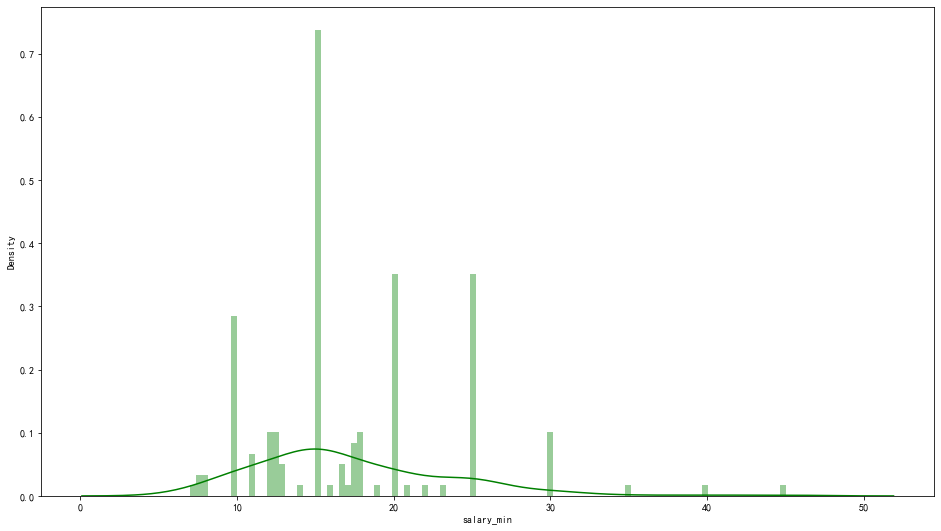

In [210]:
plt.figure(figsize = (16, 9))
sns.distplot(data1['salary_min'], color = 'g', bins = 100, hist_kws = {'alpha': 0.4})

<AxesSubplot:xlabel='salary_max', ylabel='Density'>

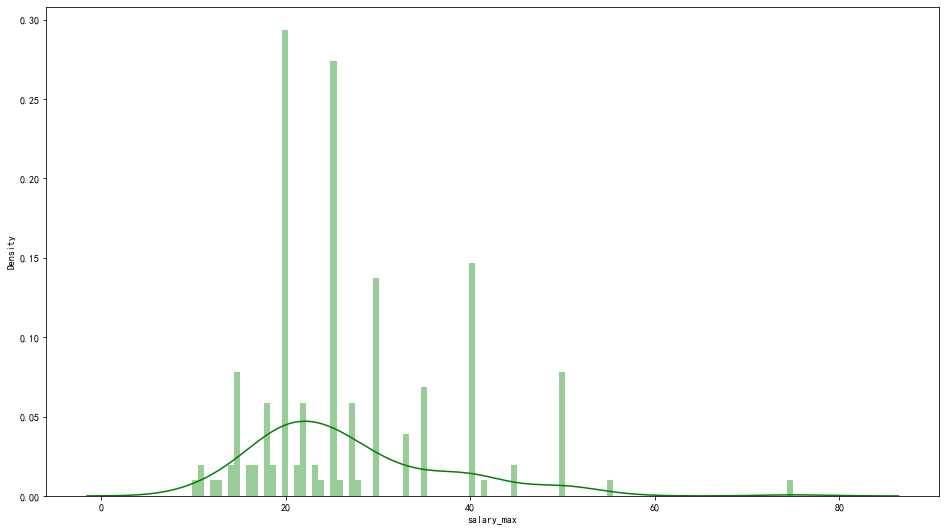

In [211]:
plt.figure(figsize = (16, 9))
sns.distplot(data1['salary_max'], color = 'g', bins = 100, hist_kws = {'alpha': 0.4})

In [212]:
data1['进度状态'].value_counts()

待查看        116
不合适         15
职位关闭        13
被查看          8
邀面试          4
发放offer      1
Name: 进度状态, dtype: int64

In [213]:
label_result = LabelEncoder()
data1['result_state'] = label_result.fit_transform(data2['进度状态'])

In [214]:
data1.head()

,职位,公司,行业,企业性质,薪酬k（最低）,薪酬k（最高）,薪酬（默认12个月）,求职平台,投递日期,进度状态,salary_min,salary_max,result_state
0,市场推广经理,万达商业管理集团有限公司广州分公司,地产,民企,15,18,16,智联招聘,2023-03-22,待查看,15.0,18.0,2
1,品牌营销主管/经理,智联猎头,其他,民企,15,25,12,智联招聘,2023-03-22,待查看,15.0,25.0,2
2,品牌经理(J11609),汤臣倍健,快消,民企,30,40,12,智联招聘,2023-03-22,待查看,30.0,40.0,2
3,品牌高级专业经理,星河湾集团,地产,民企,15,25,12,智联招聘,2023-03-24,待查看,15.0,25.0,2
4,品牌经理 Brand Manager,广州屈臣氏食品饮料有限公司,零售,民企,15,20,12,智联招聘,2023-03-24,待查看,15.0,20.0,2


In [215]:
jd_data = pd.read_excel('./jd_type_data.xlsx')
jd_data

,合计,品牌类,48,策划类,18,市场类,15,政府关系,5,拓展,3,营销,8
0,NaN,品牌经理,9,策划编辑,1.0,市场经理,3.0,哈啰出行政府环境拓展经理,1.0,商务拓展经理,1.0,策划经理（创意策划/营销策划）,1.0
1,NaN,品牌管理岗（地产板块）,3,策划副经理/经理,1.0,机器人市场经理（B端工业类，双休）,1.0,政府服务经理,1.0,市场拓展岗（景区业态）(J23468),1.0,高级产品经理-新鲜营销中心,1.0
2,NaN,品牌总监,3,策划经理,1.0,品牌市场经理,1.0,政府关系经理,1.0,拓展总监（经理）,1.0,旅游高级营销经理/总监,1.0
3,NaN,品牌管理岗,2,策划经理（创意策划/营销策划）,1.0,汽车事业部 – 市场经理,1.0,政府合作负责人-两广区域,1.0,NaN,NaN,品牌营销主管/经理,1.0
4,NaN,品牌宣传岗(J23385),2,策划推广管理,1.0,市场策划经理,1.0,政府事务专家,1.0,NaN,NaN,企业微信整合营销经理,1.0
5,NaN,高级品牌策划,1,策划总监,1.0,市场经理/高级经理,1.0,NaN,NaN,NaN,NaN,市场营销,1.0
6,NaN,高级品牌策划经理,1,房地产项目策划经理,1.0,市场品牌经理/总监,1.0,NaN,NaN,NaN,NaN,市场营销总监,1.0
7,NaN,高级品牌经理,1,高级策划经理,1.0,市场拓展岗（景区业态）(J23468),1.0,NaN,NaN,NaN,NaN,营销经理,1.0
8,NaN,酒旅品牌运营,1,高级品牌策划,1.0,市场推广经理,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,内容策划经理（for品牌端）,1,高级品牌策划经理,1.0,市场营销,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
brand_type = jd_data['品牌类'].dropna().values.tolist()
strategy_type = jd_data['策划类'].dropna().values.tolist()
marketing_type = jd_data['市场类'].dropna().values.tolist()
goverment_type = jd_data['政府关系'].dropna().values.tolist()
bd_type = jd_data['拓展'].dropna().values.tolist()
sales_type = jd_data['营销'].dropna().values.tolist()

In [217]:
strategy_type

['策划编辑',
 '策划副经理/经理',
 '策划经理',
 '策划经理（创意策划/营销策划）',
 '策划推广管理',
 '策划总监',
 '房地产项目策划经理',
 '高级策划经理',
 '高级品牌策划',
 '高级品牌策划经理',
 '高级文旅策划师',
 '内容策划经理（for品牌端）',
 '品牌策划经理',
 '品牌策划经理丨广州公司',
 '品牌战略策划顾问',
 '商业策划经理',
 '市场策划经理',
 '项目策划经理（地产住宅项目）']

In [221]:
job_type_list = []
for i in range(len(data1)):
    row = data1.iloc[i]
    
    found = False
    
    for text in brand_type:
        if text == row['职位']:
            job_type_list.append('品牌类')
            found = True
            break
    
    if not found:
        for text in strategy_type:
            if text == row['职位']:
                job_type_list.append('策划类')
                found = True
                break
                
    if not found:
        for text in marketing_type:
            if text == row['职位']:
                job_type_list.append('市场类')
                found = True
                break
                
    if not found:
        for text in goverment_type:
            if text == row['职位']:
                job_type_list.append('政府关系')
                found = True
                break
                
    if not found:
        for text in bd_type:
            if text == row['职位']:
                job_type_list.append('拓展')
                found = True
                break
                
    if not found:
        for text in sales_type:
            if text == row['职位']:
                job_type_list.append('营销')
                found = True
                break
                
    if not found:
        job_type_list.append('其他')

In [222]:
assert len(job_type_list) == len(data1)

In [223]:
data1['job_type'] = job_type_list

In [224]:
data1.head()

,职位,公司,行业,企业性质,薪酬k（最低）,薪酬k（最高）,薪酬（默认12个月）,求职平台,投递日期,进度状态,salary_min,salary_max,result_state,job_type
0,市场推广经理,万达商业管理集团有限公司广州分公司,地产,民企,15,18,16,智联招聘,2023-03-22,待查看,15.0,18.0,2,市场类
1,品牌营销主管/经理,智联猎头,其他,民企,15,25,12,智联招聘,2023-03-22,待查看,15.0,25.0,2,品牌类
2,品牌经理(J11609),汤臣倍健,快消,民企,30,40,12,智联招聘,2023-03-22,待查看,30.0,40.0,2,品牌类
3,品牌高级专业经理,星河湾集团,地产,民企,15,25,12,智联招聘,2023-03-24,待查看,15.0,25.0,2,品牌类
4,品牌经理 Brand Manager,广州屈臣氏食品饮料有限公司,零售,民企,15,20,12,智联招聘,2023-03-24,待查看,15.0,20.0,2,品牌类


In [225]:
label_industry = LabelEncoder()
data1['industry'] = label_industry.fit_transform(data1['行业'])

label_company_category = LabelEncoder()
data1['company_category'] = label_company_category.fit_transform(data1['企业性质'])

label_job_platform = LabelEncoder()
data1['job_platform'] = label_job_platform.fit_transform(data1['求职平台'])

label_job_type = LabelEncoder()
data1['job_type'] = label_job_type.fit_transform(data1['job_type'])

data1['salary_months'] = data1['薪酬（默认12个月）']

In [226]:
data1.head()

,职位,公司,行业,企业性质,薪酬k（最低）,薪酬k（最高）,薪酬（默认12个月）,求职平台,投递日期,进度状态,salary_min,salary_max,result_state,job_type,industry,company_category,job_platform,salary_months
0,市场推广经理,万达商业管理集团有限公司广州分公司,地产,民企,15,18,16,智联招聘,2023-03-22,待查看,15.0,18.0,2,2,4,3,6,16
1,品牌营销主管/经理,智联猎头,其他,民企,15,25,12,智联招聘,2023-03-22,待查看,15.0,25.0,2,1,2,3,6,12
2,品牌经理(J11609),汤臣倍健,快消,民企,30,40,12,智联招聘,2023-03-22,待查看,30.0,40.0,2,1,6,3,6,12
3,品牌高级专业经理,星河湾集团,地产,民企,15,25,12,智联招聘,2023-03-24,待查看,15.0,25.0,2,1,4,3,6,12
4,品牌经理 Brand Manager,广州屈臣氏食品饮料有限公司,零售,民企,15,20,12,智联招聘,2023-03-24,待查看,15.0,20.0,2,1,11,3,6,12


In [243]:
y = data1['result_state']
X = data1.drop(['职位', '公司', '行业', '企业性质', '薪酬k（最低）', '薪酬k（最高）', '薪酬（默认12个月）', '求职平台', '投递日期', '进度状态', 'result_state'], axis = 1, inplace = False)
        

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = 0.2, random_state = 6666)

In [244]:
X

,salary_min,salary_max,job_type,industry,company_category,job_platform,salary_months
0,15.00,18.00,2,4,3,6,16
1,15.00,25.00,1,2,3,6,12
2,30.00,40.00,1,6,3,6,12
3,15.00,25.00,1,4,3,6,12
4,15.00,20.00,1,11,3,6,12
...,...,...,...,...,...,...,...
152,16.67,33.33,0,2,1,3,12
153,10.00,20.00,0,7,1,3,12
154,20.00,40.00,0,4,1,3,12
155,15.00,20.00,0,4,1,3,12


In [245]:
label_job_platform.classes_

array(['boss直聘', 'job168', '其他', '前程无忧', '官网', '拉勾招聘', '智联招聘', '猎聘', '领英'],
      dtype=object)

In [246]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [247]:
clf.score(X_eval, y_eval)

0.53125

In [248]:
# import graphviz

# tree_data = tree.export_graphviz(clf)
# tree_graph = graphviz.Source(tree_data)
# tree_graph

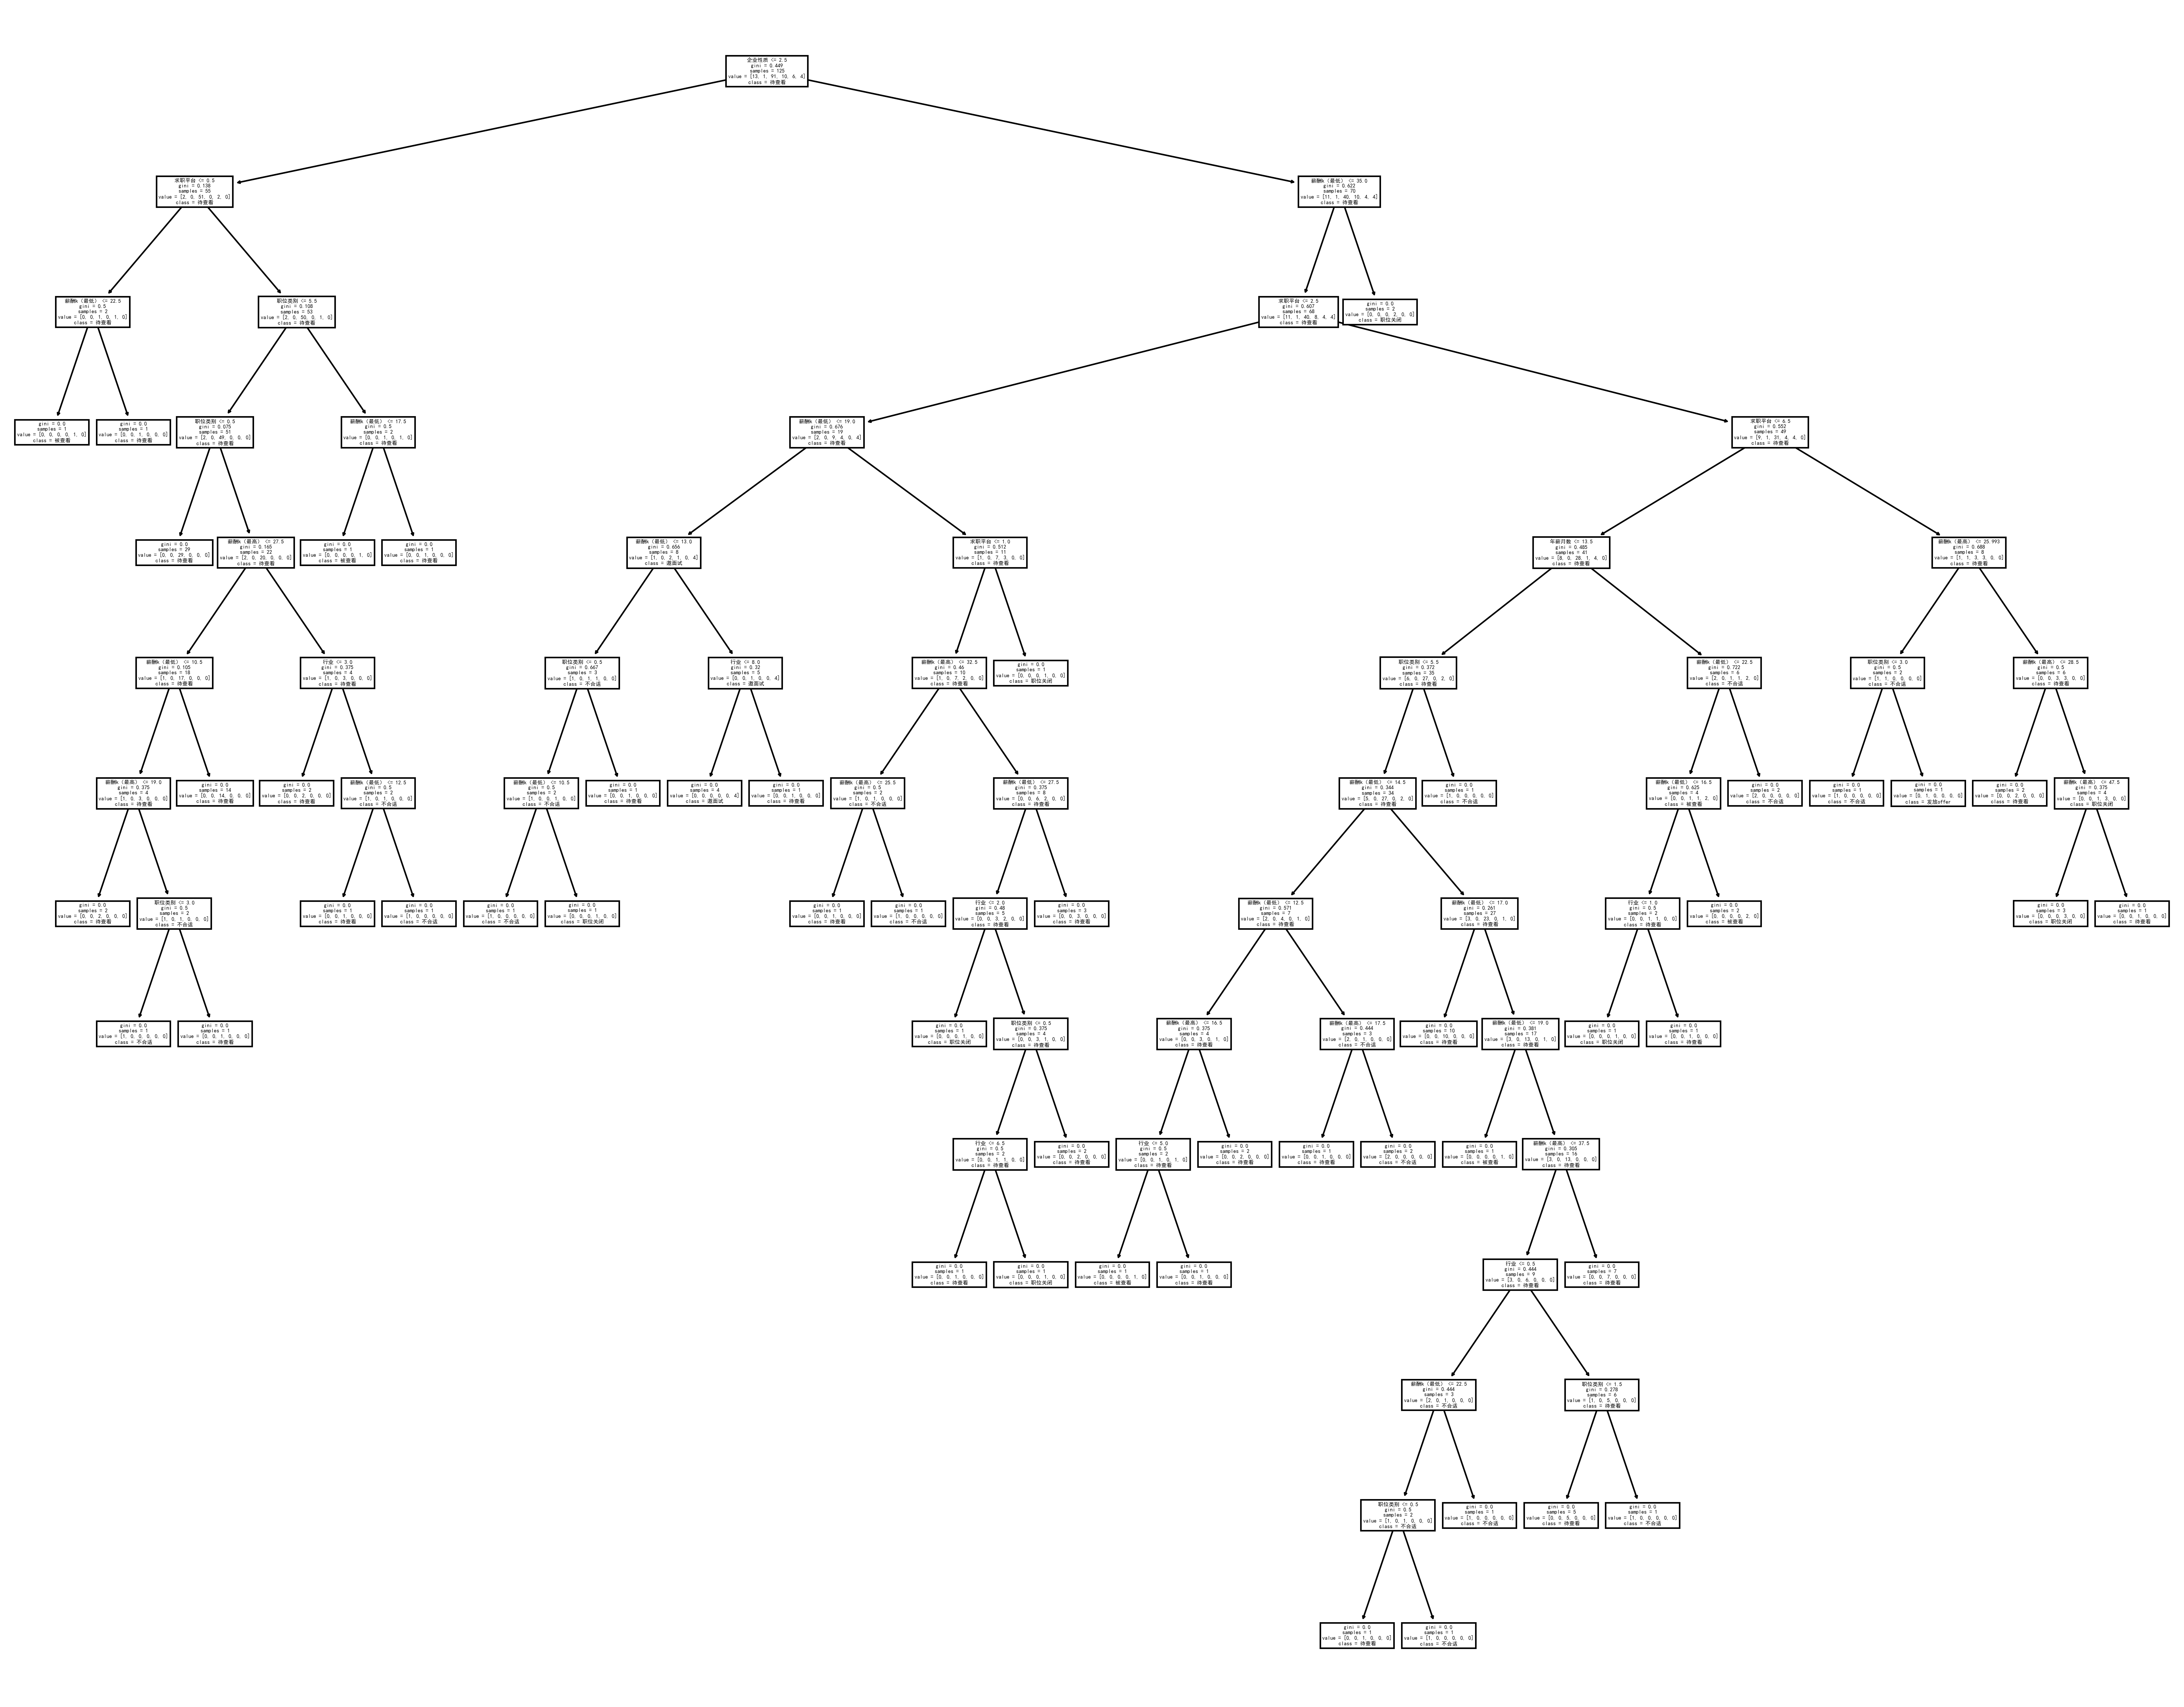

In [250]:
feature_names = ['薪酬k（最低）', '薪酬k（最高）', '职位类别', '行业', '企业性质', '求职平台', '年薪月数']
plt.figure(figsize = (25, 20), dpi = 300)
tree.plot_tree(clf, feature_names = feature_names, class_names = label_result.classes_)
plt.savefig('./job_decision_tree.png')

In [251]:
label_company_category.classes_

array(['事业单位', '国企', '外企', '民企'], dtype=object)

In [252]:
label_job_platform.classes_

array(['boss直聘', 'job168', '其他', '前程无忧', '官网', '拉勾招聘', '智联招聘', '猎聘', '领英'],
      dtype=object)